Question 2

Consider the diabetes data (diabetes.csv) has a response variable of whether a person is having diabetes, which is given by a 1.

    1) Import the dataset from https://www.kaggle.com/uciml/pima-indians-diabetes-database (1 points).
    2) Identify the columns with missing values (1 point). Fill the missing values with mean value for numerical attributes and mode value for categorical attributes. (1 points)
    3) Extract X as all columns except the last column and Y as last column. (1 points)
    4) Visualize the dataset. (2 points)
    5) Split the data into training set and testing set. (1 points) Perform 10-fold cross validation. (1 point)
    6) Train a Logistic regression model for the dataset. (2 points)
    7) Display the coefficients and form the logistic regression equation. (1 point)
    8) Compute the accuracy and confusion matrix. (1 points)
    9) Plot the decision boundary. (1 point)



Step 1. Introduction

Problem statement
Using the UCI PIMA Indian Diabetes dataset to predict a person has diabetes or not using the medical attributes provided.

IImporting the necessary libraries


In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

Step 2. Importing the DataSet

Importind the data and having a look at the basic statistics

In [92]:
data = pd.read_csv('diabetes.csv')
data.head()
data.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Step 3: Invalid data

Based on the description above, Plasma glucose levels, blood pressure, skin thickness, insulin and BMI all have min values at 0 which is not possible for a living human being. The only attribute where zero value is accepted is Pregnancies

Now as a next step we are calculating the number of Zeroes in each of the above fields

In [93]:
print("BloodPressure")
print(data[data.BloodPressure == 0].shape[0])
print(data[data.BloodPressure == 0].index.tolist())
print(data[data.BloodPressure == 0].groupby('Outcome')['BloodPressure'].count())
print("\n")

print("Glucose")
print(data[data.Glucose == 0].shape[0])
print(data[data.Glucose == 0].index.tolist())
print(data[data.Glucose == 0].groupby('Outcome')['Glucose'].count())
print("\n")

print("SkinThickness")
print(data[data.SkinThickness == 0].shape[0])
print(data[data.SkinThickness == 0].index.tolist())
print(data[data.SkinThickness == 0].groupby('Outcome')['SkinThickness'].count())
print("\n")

print("BMI")
print(data[data.BMI == 0].shape[0])
print(data[data.BMI == 0].index.tolist())
print(data[data.BMI == 0].groupby('Outcome')['BMI'].count())
print("\n")

print("Insulin")
print(data[data.Insulin == 0].shape[0])
print(data[data.Insulin == 0].index.tolist())
print(data[data.Insulin == 0].groupby('Outcome')['Insulin'].count())
print("\n")

BloodPressure
35
[7, 15, 49, 60, 78, 81, 172, 193, 222, 261, 266, 269, 300, 332, 336, 347, 357, 426, 430, 435, 453, 468, 484, 494, 522, 533, 535, 589, 601, 604, 619, 643, 697, 703, 706]
Outcome
0    19
1    16
Name: BloodPressure, dtype: int64


Glucose
5
[75, 182, 342, 349, 502]
Outcome
0    3
1    2
Name: Glucose, dtype: int64


SkinThickness
227
[2, 5, 7, 9, 10, 11, 12, 15, 17, 21, 22, 26, 29, 33, 36, 41, 44, 46, 49, 58, 60, 61, 62, 64, 67, 72, 76, 78, 81, 84, 90, 93, 100, 101, 102, 104, 106, 113, 115, 116, 117, 123, 124, 129, 131, 138, 140, 143, 148, 151, 154, 164, 167, 168, 170, 176, 178, 179, 180, 183, 184, 190, 192, 193, 196, 201, 207, 219, 221, 222, 226, 230, 233, 235, 239, 242, 246, 250, 251, 261, 264, 266, 268, 269, 272, 274, 278, 280, 283, 284, 294, 299, 300, 303, 304, 317, 319, 327, 332, 333, 336, 337, 339, 343, 344, 347, 350, 351, 354, 355, 361, 363, 366, 378, 391, 394, 398, 400, 401, 404, 406, 407, 408, 418, 426, 430, 433, 435, 437, 439, 443, 451, 453, 456, 461, 464, 468,

Step 4: Handling missing Data

Skin thickness level and Insulin values have a large number of cases with 0 values whereas Glucose, BP and BMI have much fewer cases with 0 values



There are a couple of ways I can handle these invalid data values:

1) Ignore/remove these casses - this may not work in the Skin Thickness and Insulin levels have large number of such invalid data points, removing those would leave me with very little data in an already small dataset. This may work for bmi, glucose and BP invalid data points

2) put average/mean values - 

3) not using those features for the classification algorthm - this may work, perhaps in the case of skin thickness.

Since in the problem statement it is asked to use mean for missing values replacing it with mean.

Also we ensure that after the replacement there are no Zero entries by repeating the previous check of no. of zeroes



In [94]:
nonzero_mean_BloodPressure = data[data.BloodPressure != 0].mean().BloodPressure
print ("Non Zero Mean for BloodPressure is "+ str(nonzero_mean_BloodPressure))
data[ 'BloodPressure' ] = data['BloodPressure'].replace(0, nonzero_mean_BloodPressure)
print("BloodPressure")
print(data[data.BloodPressure == 0].shape[0])
print(data[data.BloodPressure == 0].index.tolist())
print(data[data.BloodPressure == 0].groupby('Outcome')['BloodPressure'].count())
print("\n")

nonzero_mean_Glucose = data[data.Glucose != 0].mean().Glucose
print ("Non Zero Mean for Glucose is "+ str(nonzero_mean_Glucose))
data[ 'Glucose' ] = data['Glucose'].replace(0, nonzero_mean_Glucose)
print("Glucose")
print(data[data.Glucose == 0].shape[0])
print(data[data.Glucose == 0].index.tolist())
print(data[data.Glucose == 0].groupby('Outcome')['Glucose'].count())
print("\n")

nonzero_mean_SkinThickness = data[data.SkinThickness != 0].mean().SkinThickness
print ("Non Zero Mean for SkinThickness is "+ str(nonzero_mean_SkinThickness))
data[ 'SkinThickness' ] = data['SkinThickness'].replace(0, nonzero_mean_SkinThickness)
print("SkinThickness")
print(data[data.SkinThickness == 0].shape[0])
print(data[data.SkinThickness == 0].index.tolist())
print(data[data.SkinThickness == 0].groupby('Outcome')['SkinThickness'].count())
print("\n")

nonzero_mean_BMI = data[data.BMI != 0].mean().BMI
print ("Non Zero Mean for BMI is "+ str(nonzero_mean_BMI))
data[ 'BMI' ] = data['BMI'].replace(0, nonzero_mean_BMI)
print("BMI")
print(data[data.BMI == 0].shape[0])
print(data[data.BMI == 0].index.tolist())
print(data[data.BMI == 0].groupby('Outcome')['BMI'].count())
print("\n")

nonzero_mean_Insulin = data[data.Insulin != 0].mean().Insulin
print ("Non Zero Mean for Insulin is "+ str(nonzero_mean_Insulin))
data[ 'Insulin' ] = data['Insulin'].replace(0, nonzero_mean_Insulin)
print("Insulin")
print(data[data.Insulin == 0].shape[0])
print(data[data.Insulin == 0].index.tolist())
print(data[data.Insulin == 0].groupby('Outcome')['Insulin'].count())
print("\n")


Non Zero Mean for BloodPressure is 72.40518417462484
BloodPressure
0
[]
Series([], Name: BloodPressure, dtype: int64)


Non Zero Mean for Glucose is 121.6867627785059
Glucose
0
[]
Series([], Name: Glucose, dtype: int64)


Non Zero Mean for SkinThickness is 29.153419593345657
SkinThickness
0
[]
Series([], Name: SkinThickness, dtype: int64)


Non Zero Mean for BMI is 32.45746367239099
BMI
0
[]
Series([], Name: BMI, dtype: int64)


Non Zero Mean for Insulin is 155.5482233502538
Insulin
0
[]
Series([], Name: Insulin, dtype: int64)




Step 5: Visualizing the processed data attribute wise.

The follwing plots gives two info
1) a percentage of the people who are diagnised with diabeted for each attribute value
2) Count. This gives a spread of the diabetetic and Non diabetic people over the span of the attriibute

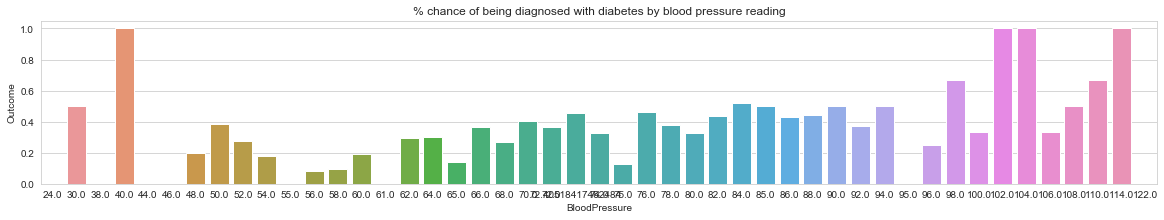

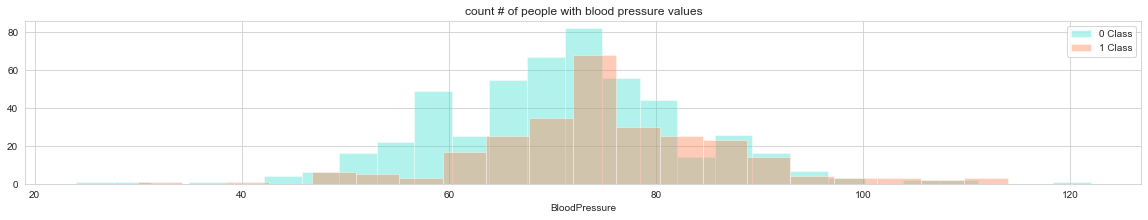

In [95]:
plt.figure(figsize=(20,3))
bp_pivot = data.groupby('BloodPressure').Outcome.mean().reset_index()
sns.barplot(bp_pivot.BloodPressure, bp_pivot.Outcome)
plt.title('% chance of being diagnosed with diabetes by blood pressure reading')
plt.show()

plt.figure(figsize=(20,3))
bp_pivot = data.groupby('BloodPressure').Outcome.count().reset_index()
sns.distplot(data[data.Outcome == 0]['BloodPressure'], color='turquoise', kde=False, label='0 Class')
sns.distplot(data[data.Outcome == 1]['BloodPressure'], color='coral', kde=False, label='1 Class')
plt.legend()
plt.title('count # of people with blood pressure values')
plt.show()

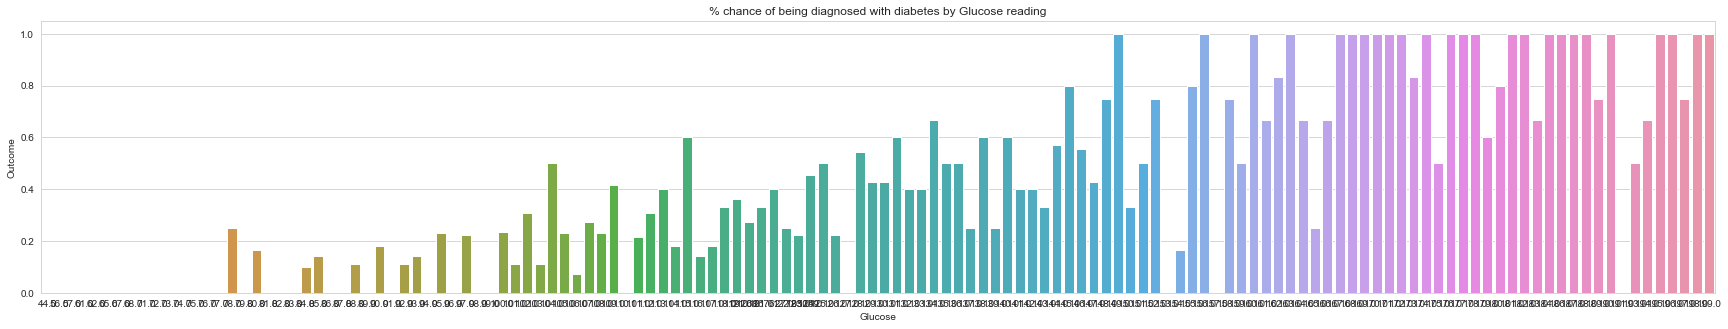

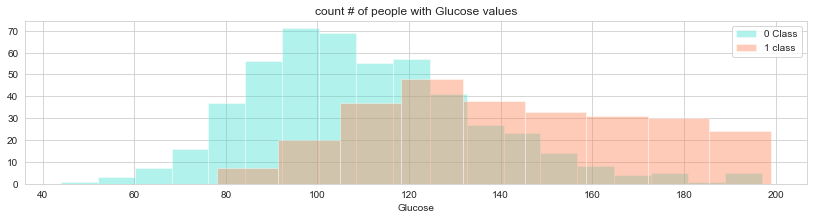

In [96]:


plt.figure(figsize=(30,5))
glucose_pivot = data.groupby('Glucose').Outcome.mean().reset_index()
sns.barplot(glucose_pivot.Glucose, glucose_pivot.Outcome)
plt.title('% chance of being diagnosed with diabetes by Glucose reading')
plt.show()

plt.figure(figsize=(14,3))
glucose_pivot = data.groupby('Glucose').Outcome.count().reset_index()
sns.distplot(data[data.Outcome == 0]['Glucose'], color='turquoise', kde=False, label='0 Class')
sns.distplot(data[data.Outcome == 1]['Glucose'], color='coral', kde=False, label='1 class')
plt.legend()
plt.title('count # of people with Glucose values')
plt.show()



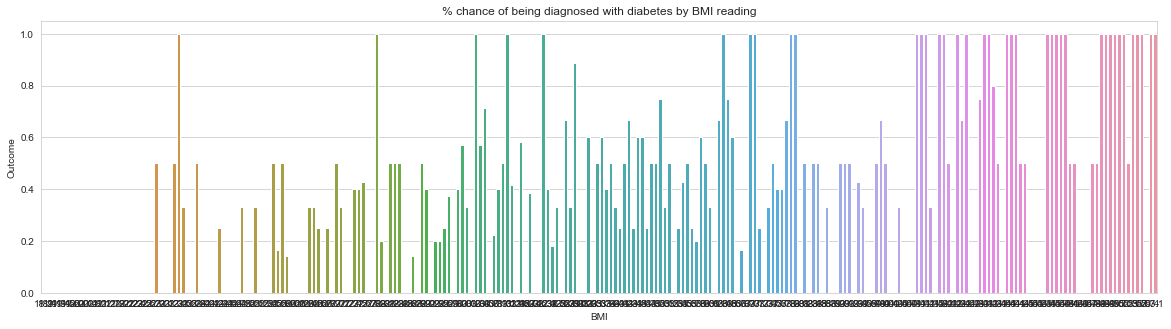

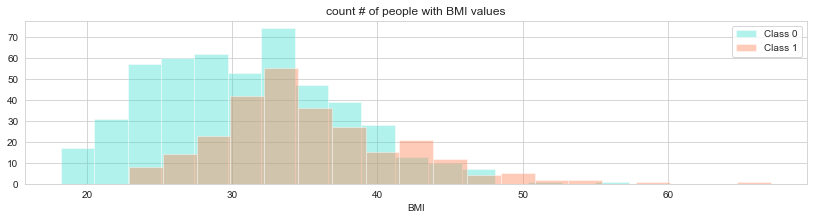

In [97]:
plt.figure(figsize=(20,5))
BMI_pivot = data.groupby('BMI').Outcome.mean().reset_index()
sns.barplot(BMI_pivot.BMI, BMI_pivot.Outcome)
plt.title('% chance of being diagnosed with diabetes by BMI reading')
plt.show()

plt.figure(figsize=(14,3))
BMI_pivot = data.groupby('BMI').Outcome.count().reset_index()
sns.distplot(data[data.Outcome == 0]['BMI'], color='turquoise', kde=False, label='Class 0')
sns.distplot(data[data.Outcome == 1]['BMI'], color='coral', kde=False, label='Class 1')
plt.legend()
plt.title('count # of people with BMI values')
plt.show()

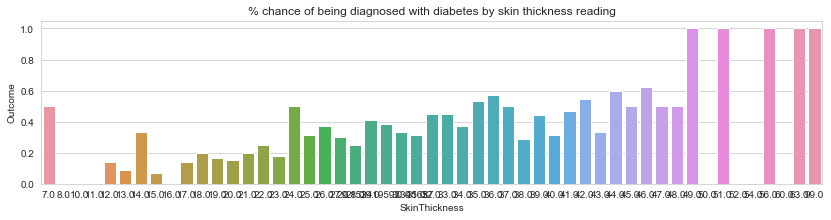

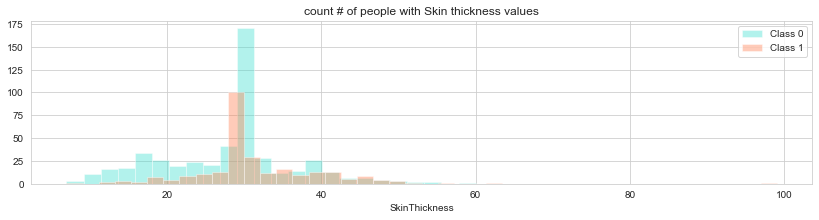

In [98]:
plt.figure(figsize=(14,3))
SkinThickness_pivot = data.groupby('SkinThickness').Outcome.mean().reset_index()
sns.barplot(SkinThickness_pivot.SkinThickness, SkinThickness_pivot.Outcome)
plt.title('% chance of being diagnosed with diabetes by skin thickness reading')
plt.show()

plt.figure(figsize=(14,3))
SkinThickness_pivot = data.groupby('SkinThickness').Outcome.count().reset_index()
sns.distplot(data[data.Outcome == 0]['SkinThickness'], color='turquoise', kde=False, label='Class 0')
sns.distplot(data[data.Outcome == 1]['SkinThickness'], color='coral', kde=False, label='Class 1')
plt.legend()
plt.title('count # of people with Skin thickness values')
plt.show()

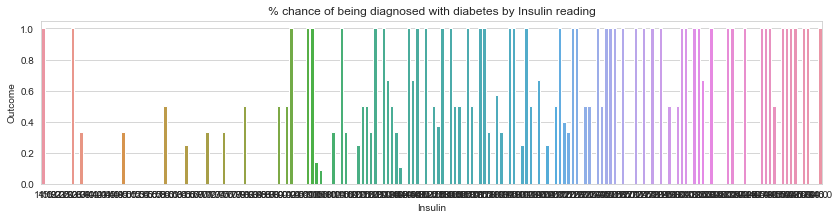

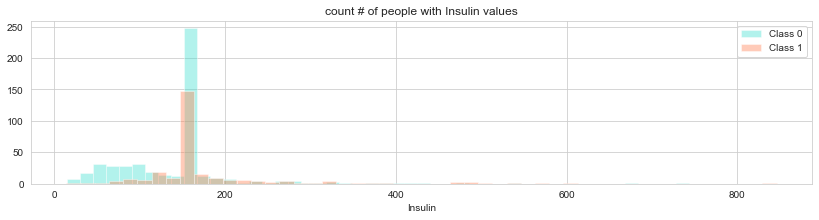

In [99]:
plt.figure(figsize=(14,3))
Insulin_pivot = data.groupby('Insulin').Outcome.mean().reset_index()
sns.barplot(Insulin_pivot.Insulin, Insulin_pivot.Outcome)
plt.title('% chance of being diagnosed with diabetes by Insulin reading')
plt.show()

plt.figure(figsize=(14,3))
Insulin_pivot = data.groupby('Insulin').Outcome.count().reset_index()
sns.distplot(data[data.Outcome == 0]['Insulin'], color='turquoise', kde=False, label='Class 0')
sns.distplot(data[data.Outcome == 1]['Insulin'], color='coral', kde=False, label='Class 1')
plt.legend()
plt.title('count # of people with Insulin values')
plt.show()


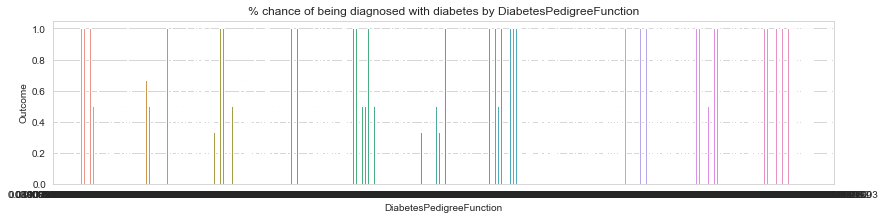

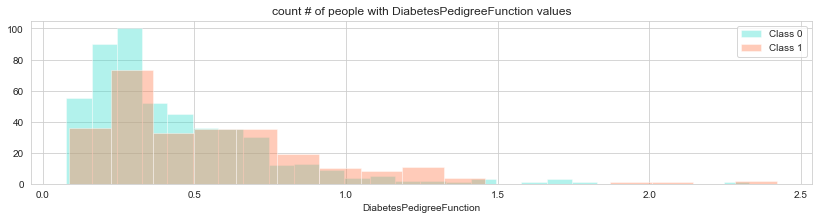

In [100]:

plt.figure(figsize=(14,3))
DiabetesPedigreeFunction_pivot = data.groupby('DiabetesPedigreeFunction').Outcome.mean().reset_index()
sns.barplot(DiabetesPedigreeFunction_pivot.DiabetesPedigreeFunction, DiabetesPedigreeFunction_pivot.Outcome)
plt.title('% chance of being diagnosed with diabetes by DiabetesPedigreeFunction')
plt.show()

plt.figure(figsize=(14,3))
DiabetesPedigreeFunction_pivot = data.groupby('DiabetesPedigreeFunction').Outcome.count().reset_index()
sns.distplot(data[data.Outcome == 0]['DiabetesPedigreeFunction'], color='turquoise', kde=False, label='Class 0')
sns.distplot(data[data.Outcome == 1]['DiabetesPedigreeFunction'], color='coral', kde=False, label='Class 1')
plt.legend()
plt.title('count # of people with DiabetesPedigreeFunction values')
plt.show()


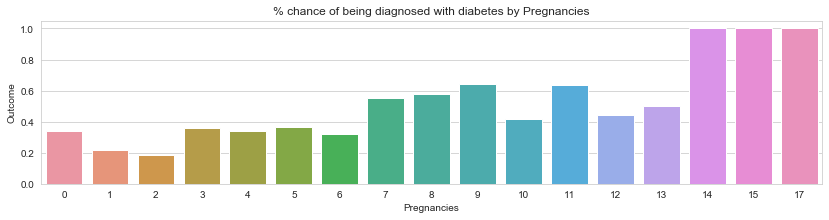

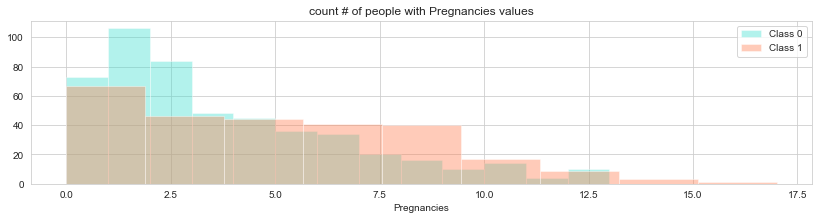

In [101]:

plt.figure(figsize=(14,3))
Pregnancies_pivot = data.groupby('Pregnancies').Outcome.mean().reset_index()
sns.barplot(Pregnancies_pivot.Pregnancies, Pregnancies_pivot.Outcome)
plt.title('% chance of being diagnosed with diabetes by Pregnancies')
plt.show()

plt.figure(figsize=(14,3))
Pregnancies_pivot = data.groupby('Pregnancies').Outcome.count().reset_index()
sns.distplot(data[data.Outcome == 0]['Pregnancies'], color='turquoise', kde=False, label='Class 0')
sns.distplot(data[data.Outcome == 1]['Pregnancies'], color='coral', kde=False, label='Class 1')
plt.legend()
plt.title('count # of people with Pregnancies values')
plt.show()

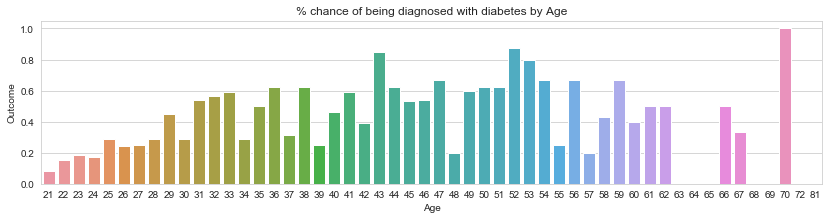

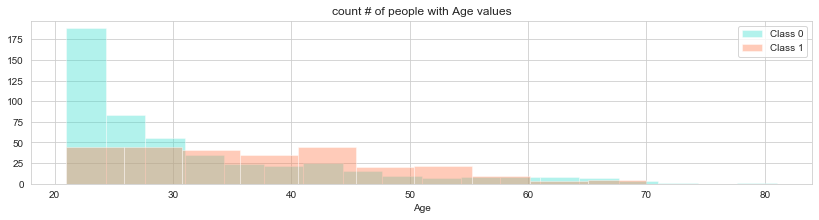

In [102]:

plt.figure(figsize=(14,3))
Age_pivot = data.groupby('Age').Outcome.mean().reset_index()
sns.barplot(Age_pivot.Age, Age_pivot.Outcome)
plt.title('% chance of being diagnosed with diabetes by Age')
plt.show()

plt.figure(figsize=(14,3))
Age_pivot = data.groupby('Age').Outcome.count().reset_index()
sns.distplot(data[data.Outcome == 0]['Age'], color='turquoise', kde=False, label='Class 0')
sns.distplot(data[data.Outcome == 1]['Age'], color='coral', kde=False, label='Class 1')
plt.legend()
plt.title('count # of people with Age values')
plt.show()

Step 6: Trying to reduce the dimesion 
1) by checking the correlation of variopus attributes with the outcome. We see below that Glucose and BMI are the two most correlated values to outcome
2) Trying to do PCA and get two most factors with maximum variance pca1 and pca2

In [103]:
correlations = data.corr()
correlations['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.492928
BMI                         0.311924
Age                         0.238356
Pregnancies                 0.221898
SkinThickness               0.215299
Insulin                     0.214411
DiabetesPedigreeFunction    0.173844
BloodPressure               0.166074
Name: Outcome, dtype: float64

In [104]:
from sklearn.decomposition import PCA
pca = PCA(2)

#principalComponents = pca.fit(X)
#principalComponents.explained_variance_ratio_
X = data[['Glucose','BMI','Age','Pregnancies','SkinThickness','Insulin','DiabetesPedigreeFunction','BloodPressure']].values
y = data[['Outcome']].values
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pca1', 'pca2'])
principalDf.head


<bound method NDFrame.head of           pca1       pca2
0     4.827421  27.861962
1    -6.298864 -36.897692
2     9.915325  57.843915
3   -66.588522 -24.105985
4    14.654496   9.615783
..         ...        ...
763  21.679027 -18.996614
764  -0.087036  -0.672504
765 -43.299894   5.626324
766   0.809456   4.208218
767  -5.002132 -29.358958

[768 rows x 2 columns]>

Step 7: Splitting the data into Test and Train
Step 8: Using K fold validation

Also plotting the coefficient for each fold
Please find the total Accuracy below using the method.

In [105]:

from sklearn.model_selection import cross_val_score, cross_val_predict, KFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X = sc.fit_transform(X)



mean = np.mean(X, axis=0)
print('Mean: (%d, %d)' % (mean[0], mean[1]))
standard_deviation = np.std(X, axis=0)
print('Standard deviation: (%d, %d)' % (standard_deviation[0], standard_deviation[1]))
print(X)

kfold = KFold(10)
y_pred = []
Y=y
fold = 1
for train_index, test_index in kfold.split(data):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], Y[train_index], Y[test_index]
    classifier = LogisticRegression(random_state = 0, solver='lbfgs', max_iter=1000000)
    classifier.fit(X_train,y_train.ravel())
    y_pred.extend(classifier.predict(X_test))
    print("Coefficients for Fold :", fold)
    print(classifier.coef_)
    print("intercept:")
    print(classifier.intercept_)
    fold = fold+1

    
print("\n\nTotal Accuracy:", accuracy_score(y_pred, Y))
accuracy_all = accuracy_score(y_pred, Y)
print("Confusion Matrix: \n", confusion_matrix(y_pred, Y))
precision, recall = precision_recall(y_pred, Y)
print('Precision: %f Recall %f' % (precision, recall))
print(classification_report(y_pred, Y))



Mean: (0, 0)
Standard deviation: (1, 1)
[[ 8.65108070e-01  1.66291742e-01  1.42599540e+00 ... -3.34507888e-16
   4.68491977e-01 -3.35182392e-02]
 [-1.20616153e+00 -8.52531177e-01 -1.90671905e-01 ... -3.34507888e-16
  -3.65060778e-01 -5.29859033e-01]
 [ 2.01581340e+00 -1.33283341e+00 -1.05584152e-01 ... -3.34507888e-16
   6.04397318e-01 -6.95305964e-01]
 ...
 [-2.25789027e-02 -9.10749630e-01 -2.75759658e-01 ... -5.12538638e-01
  -6.85193357e-01 -3.35182392e-02]
 [ 1.41807574e-01 -3.43119717e-01  1.17073215e+00 ... -3.34507888e-16
  -3.71101015e-01 -1.02619983e+00]
 [-9.43143171e-01 -2.99455878e-01 -8.71373930e-01 ... -3.34507888e-16
  -4.73785050e-01 -1.98965170e-01]]
Coefficients for Fold : 1
[[ 1.20849337  0.64056625  0.13815869  0.42971058  0.00223092 -0.11401741
   0.32495122 -0.08876316]]
intercept:
[-0.88287667]
Coefficients for Fold : 2
[[ 1.09587944  0.57310885  0.08995554  0.4626017   0.08135095 -0.02743178
   0.27855483 -0.12156372]]
intercept:
[-0.8420907]
Coefficients for Fo

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


model = LogisticRegression(solver='lbfgs')

model.fit(X_train, y_train.ravel())
y_pred = model.predict(X_test)


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


def precision_recall(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)    
    tp = cm[0,0]
    fp = cm[0,1]
    fn = cm[1,0]
    prec = tp / (tp+fp)
    rec = tp / (tp+fn)    
    return prec, rec

precision, recall = precision_recall(y_test, y_pred)
print('Precision: %f Recall %f' % (precision, recall))

[[97 10]
 [19 28]]
Precision: 0.906542 Recall 0.836207


Step: 8 Plotting Decision boundry only using the high correlated attributes.
We have used only the high correlated(Glucose and BMI) attributes found previously and neglecting the remaining

In [107]:
X = data[['Glucose','BMI']].values
y = data[['Outcome']].values


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)



mean = np.mean(X, axis=0)
print('Mean: (%d, %d)' % (mean[0], mean[1]))
standard_deviation = np.std(X, axis=0)
print('Standard deviation: (%d, %d)' % (standard_deviation[0], standard_deviation[1]))



from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs')

model.fit(X_train, y_train.ravel())
y_pred = model.predict(X_test)
print("Coefficients :")
print(model.coef_)
print("intercept:")
print(model.intercept_)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)



Mean: (0, 0)
Standard deviation: (1, 1)
Coefficients :
[[1.1340891 0.5576134]]
intercept:
[-0.75494382]
[[95 12]
 [21 26]]


In [108]:
def precision_recall(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)    
    tp = cm[0,0]
    fp = cm[0,1]
    fn = cm[1,0]
    prec = tp / (tp+fp)
    rec = tp / (tp+fn)    
    return prec, rec

precision, recall = precision_recall(y_test, y_pred)
print('Precision: %f Recall %f' % (precision, recall))
print("\n\nTotal Accuracy:", accuracy_score(y_pred, y_test))
accuracy_Corr = accuracy_score(y_pred, y_test)

Precision: 0.887850 Recall 0.818966


Total Accuracy: 0.7857142857142857


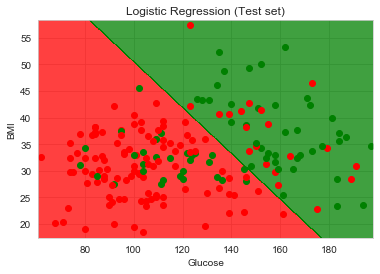

In [109]:
from matplotlib.colors import ListedColormap
from functools import reduce
X = data[['Glucose','BMI']].values
X_train, X_test, Y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)
classifier = LogisticRegression(random_state = 0, solver='lbfgs', max_iter=1000000)

from matplotlib.colors import ListedColormap
classifier.fit(X_train,Y_train.ravel())
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.05),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.05))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

i=0;
for j in y_set:
    plt.scatter(X_set[i, 0], X_set[i, 1],
            c = ListedColormap(('red', 'green'))(j))
    i=i+1

plt.title('Logistic Regression (Test set)')

plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.show()

Step: 9 Plotting Decision boundry only using the PCA with 2 degrees.
We have used only the high pca1 and pca2 attributes found previously and neglecting the remaining

Coefficients :
[[1.1340891 0.5576134]]
intercept:
[-0.75494382]
[[102  21]
 [ 33  36]]
Precision: 0.829268 Recall 0.755556


Total Accuracy: 0.71875


No handles with labels found to put in legend.


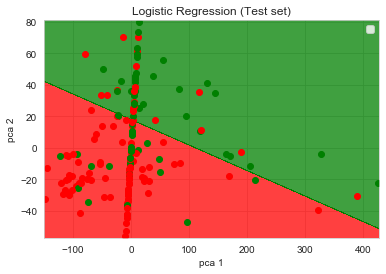

In [110]:
from matplotlib.colors import ListedColormap
from functools import reduce
X_train, X_test, Y_train, y_test = train_test_split(principalDf.values, Y, test_size = 0.25, random_state = 42)
classifier = LogisticRegression(random_state = 0, solver='lbfgs', max_iter=1000000)

from matplotlib.colors import ListedColormap
classifier.fit(X_train,Y_train.ravel())

y_pred = classifier.predict(X_test)
print("Coefficients :")
print(model.coef_)
print("intercept:")
print(model.intercept_)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

precision, recall = precision_recall(y_test, y_pred)
print('Precision: %f Recall %f' % (precision, recall))
print("\n\nTotal Accuracy:", accuracy_score(y_pred, y_test))
accuracy_PCA = accuracy_score(y_pred, y_test)
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.05),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.05))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

i=0;
for j in y_set:
    plt.scatter(X_set[i, 0], X_set[i, 1],
            c = ListedColormap(('red', 'green'))(j))
    i=i+1

plt.title('Logistic Regression (Test set)')

plt.xlabel('pca 1')
plt.ylabel('pca 2')
plt.legend()
plt.show()

Step 10: Comparing Accuracies

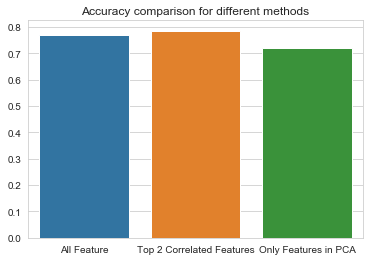

In [113]:
Method = ["All Feature", "Top 2 Correlated Features", "Only Features in PCA"]
Accuracy = [accuracy_all,accuracy_Corr,accuracy_PCA]
sns.barplot(Method, Accuracy)
plt.title('Accuracy comparison for different methods')
plt.show()